In [1]:
from master_thesis.src import models, utils, data
from master_thesis.experiments import predict
import scipy.stats as st
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
bert_pred, bert_true = predict.predict(which="bert", identifier=512, val_batch_size=200, on_set='dev') # first 512

Predicting with model BERT with identifier 512...
Using device: cpu


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (104046, 42)
Remaining df after conditioning: (12743, 42)
Pearson's r of this batch: (0.6249984306280099, 4.545406061034568e-23)
Pearson's r of this batch: (0.6587504460993273, 2.910793096338435e-26)
Pearson's r of this batch: (0.6540199238572991, 8.633767917806947e-26)
Pearson's r of this batch: (0.6230801486755855, 6.721502076291686e-23)
Pearson's r of this batch: (0.6337387300494997, 7.385122144553108e-24)
Pearson's r of this batch: (0.6355992446895588, 4.97839458416993e-24)
Pearson's r of this batch: (0.5597847717604261, 2.1575969120977603e-07)
Pearson's r on whole dev set: (0.6293761923778717, 1.7272653107576444e-141)


In [2]:
def scatter(true, pred):
    print(len(true), true[:5])
    print(len(pred), pred[:5])
    plt.scatter(true, pred, alpha = 0.2)
    plt.xlabel('True')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.show()
    
    print("Pearson:", st.pearsonr(true, pred))
    print("MAE:", mean_absolute_error(true, pred))
    print("MSE:", mean_squared_error(true, pred))

[0.21445708 1.9069834  0.42172173 0.45790696 0.1578324 ]
[0.28743502 1.2092361  0.56740487 0.2945289  0.255347  ]


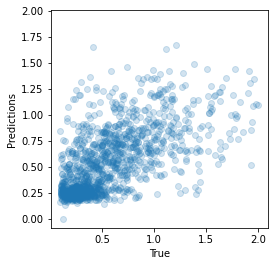

Pearson: (0.6293761923778717, 1.7272653107576444e-141)
MAE: 0.22228794
MSE: 0.09870366


In [13]:
scatter(bert_true, bert_pred) # first 512

In [7]:
cnn_pred, cnn_true = predict.predict(which="cnn", identifier=500, val_batch_size=200) # first 500

Predicting with model CNN with identifier 500...
Using device: cpu
file already exists
loading embeddings ...
done loading embs FULL


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (104046, 42)
Remaining df after conditioning: (12743, 42)
Pearson's r of this batch: (0.666683240334978, 4.495498942186881e-27)
Pearson's r of this batch: (0.6558988340408598, 5.619094070022175e-26)
Pearson's r of this batch: (0.6818349794598936, 1.0766150014253514e-28)
Pearson's r of this batch: (0.6572363907283524, 4.1310896465893994e-26)
Pearson's r of this batch: (0.6610554394274011, 1.7015065859248102e-26)
Pearson's r of this batch: (0.7038329964875131, 3.1391393267502047e-31)
Pearson's r of this batch: (0.6277368544003493, 2.1528386246154997e-09)
Pearson's r on whole dev set: (0.6666460321937744, 1.5334007487340938e-164)


[0.21445708 1.9069834  0.42172173 0.45790696 0.1578324 ]
[0.27162653 0.9662358  0.615705   0.28373212 0.27193183]


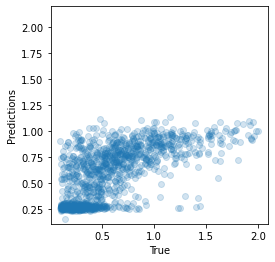

Pearson: (0.6666460321937744, 1.5334007487340938e-164)
MAE: 0.20981003
MSE: 0.08643341


In [14]:
scatter(cnn_true, cnn_pred) # first 500

## Inspect if train-dev-test ist comparable

In [25]:
df = utils.get_conditioned_df()
df = df[['pageviews', 'text_preprocessed', 'avgTimeOnPagePerNr_tokens']] # to save space?

Shape of raw df: (104046, 42)
Remaining df after conditioning: (12743, 42)


In [26]:
df.head()

,pageviews,text_preprocessed,avgTimeOnPagePerNr_tokens
0,375158,Kurz vor Ende des meteorologischen Winters zei...,0.601536
4,350,Die Palästinenserführung hat den Nahost-Plan v...,0.172316
12,794,Gute Nachrichten von der Isolierstation: Den v...,0.186514
18,177,Autofahrer stehen in deutschen Städten immer l...,0.162025
24,261,"Bevor es besser rollt, rollt es erst einmal la...",0.249479


In [27]:
df_train, df_dev, df_test = data.create_train_dev_test(df=df, random_seed=123)

In [31]:
df_train.describe().round(3)

,pageviews,avgTimeOnPagePerNr_tokens
count,10194.000,10194.000
mean,1574.396,0.546
std,15566.793,0.389
min,100.000,0.100
25%,154.000,0.252
50%,290.000,0.428
75%,812.000,0.736
max,1061773.000,1.997


In [33]:
df_dev.describe().round(3)

,pageviews,avgTimeOnPagePerNr_tokens
count,1274.000,1274.000
mean,1122.624,0.569
std,4069.731,0.395
min,100.000,0.100
25%,145.000,0.264
50%,269.000,0.455
75%,760.000,0.772
max,82559.000,2.000


In [34]:
df_test.describe().round(3)

,pageviews,avgTimeOnPagePerNr_tokens
count,1275.000,1275.000
mean,1012.783,0.568
std,2645.557,0.385
min,100.000,0.101
25%,154.000,0.263
50%,287.000,0.478
75%,762.000,0.765
max,35253.000,1.973


## predict on other sets, so see if especially CNN still has this strange thing

In [2]:
bert_pred_test, bert_true_test = predict.predict(which="bert", 
                                                 identifier=512, 
                                                 val_batch_size=200, 
                                                 on_set='test') # first 512

Predicting with model BERT with identifier 512...
Using device: cpu


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (104046, 42)
Remaining df after conditioning: (12743, 42)
Pearson's r of this batch: (0.6717147160064656, 1.3341851967099677e-27)
Pearson's r of this batch: (0.623610976949883, 6.033520668888718e-23)
Pearson's r of this batch: (0.6301745934955952, 1.560331252656538e-23)
Pearson's r of this batch: (0.6403826158758997, 1.7838048831460895e-24)
Pearson's r of this batch: (0.504231781162052, 2.6979035446713193e-14)
Pearson's r of this batch: (0.6650631283145073, 6.614124933919437e-27)
Pearson's r of this batch: (0.7188572849000285, 3.7928985471825347e-13)
Pearson's r on whole set: (0.6304865569056951, 3.0606360945751723e-142)


[0.18464866 0.43786788 1.0694267  1.9593703  0.70388854]
[0.22957438 0.570984   0.8385685  1.3807483  0.5699502 ]


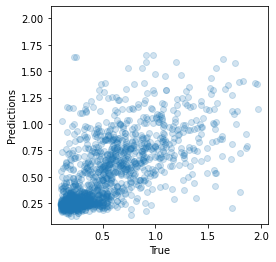

Pearson: (0.6304865569056951, 3.0606360945751723e-142)
MAE: 0.21792787
MSE: 0.09593533


In [5]:
scatter(bert_true_test, bert_pred_test) # first 512

In [3]:
# Achtung: Das hier ist kein Wunder, natürlich ist das Modell auf TRAIN gut...
bert_pred_train, bert_true_train = predict.predict(which="bert", 
                                                 identifier=512, 
                                                 val_batch_size=200, 
                                                 on_set='train') # first 512

Predicting with model BERT with identifier 512...
Using device: cpu


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (104046, 42)
Remaining df after conditioning: (12743, 42)
Pearson's r of this batch: (0.9195544214990647, 2.955590469868515e-82)
Pearson's r of this batch: (0.9286748103297766, 3.1371998478815907e-87)
Pearson's r of this batch: (0.9264372785138844, 5.9667627815986054e-86)
Pearson's r of this batch: (0.9174656861558435, 3.364452607819436e-81)
Pearson's r of this batch: (0.8950375798476998, 2.3291363630754893e-71)
Pearson's r of this batch: (0.9231828388062345, 3.67959331756862e-84)
Pearson's r of this batch: (0.9067740939693324, 3.37941491363766e-76)
Pearson's r of this batch: (0.9334163270699735, 4.388168912952708e-90)
Pearson's r of this batch: (0.9221549137217477, 1.3026070608057537e-83)
Pearson's r of this batch: (0.9186424561265895, 8.616044438955578e-82)
Pearson's r of this batch: (0.915553026869856, 2.950570016874043e-80)
Pearson's r on whole set: (0.9188321085921344, 0.0)


2200 [0.5154372  0.6823602  1.1555272  0.4460767  0.66992337]
2200 [0.46816096 0.6139306  1.0602468  0.3409424  0.6361812 ]


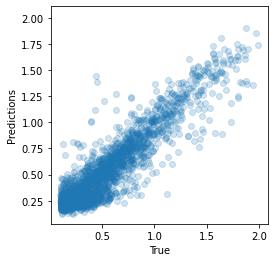

Pearson: (0.9188321085921344, 0.0)
MAE: 0.108518645
MSE: 0.023102073


In [4]:
scatter(bert_true_train, bert_pred_train) # first 512

In [6]:
cnn_pred_test, cnn_true_test = predict.predict(which="cnn", 
                                               identifier=500, 
                                               val_batch_size=200, 
                                               on_set='test') # first 500

Predicting with model CNN with identifier 500...
Using device: cpu
file already exists
loading embeddings ...
done loading embs FULL


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (104046, 42)
Remaining df after conditioning: (12743, 42)
Pearson's r of this batch: (0.6721692642706366, 1.194111139368785e-27)
Pearson's r of this batch: (0.6478696867491124, 3.448423751992519e-25)
Pearson's r of this batch: (0.6636221475541976, 9.305669368906736e-27)
Pearson's r of this batch: (0.7264097956607052, 4.366704806935753e-34)
Pearson's r of this batch: (0.5987126288105977, 7.71614982576888e-21)
Pearson's r of this batch: (0.6861000405954562, 3.614501813043453e-29)
Pearson's r of this batch: (0.6946559230535146, 4.756711539048757e-12)
Pearson's r on whole set: (0.6682877289517221, 9.209538533931381e-166)


[0.18464866 0.43786788 1.0694267  1.9593703  0.70388854]
[0.2683898  0.46596512 0.7693355  0.9953435  0.662602  ]


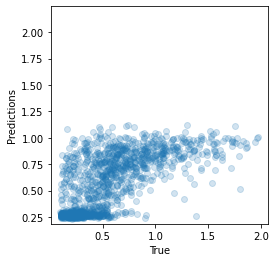

Pearson: (0.6682877289517221, 9.209538533931381e-166)
MAE: 0.20739521
MSE: 0.082346074


In [7]:
scatter(cnn_true_test, cnn_pred_test) # first 500

In [5]:
# Achtung: Das hier ist kein Wunder, natürlich ist das Modell auf TRAIN gut...
cnn_pred_train, cnn_true_train = predict.predict(which="cnn", 
                                                identifier=500, 
                                                val_batch_size=200, 
                                                on_set='train') # first 500

Predicting with model CNN with identifier 500...
Using device: cpu
file already exists
loading embeddings ...
done loading embs FULL


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (104046, 42)
Remaining df after conditioning: (12743, 42)
Pearson's r of this batch: (0.6724610847161193, 1.1119200296112168e-27)
Pearson's r of this batch: (0.7373594963199451, 1.410795454117071e-35)
Pearson's r of this batch: (0.5935589285077529, 1.999382848469754e-20)
Pearson's r of this batch: (0.7168542269936016, 7.641955905001236e-33)
Pearson's r of this batch: (0.7305926059056643, 1.2004339940774148e-34)
Pearson's r of this batch: (0.7020591971269979, 5.126709904177596e-31)
Pearson's r of this batch: (0.7012424312560949, 6.418028128391665e-31)
Pearson's r of this batch: (0.6297595059092328, 1.70128488237783e-23)
Pearson's r of this batch: (0.6988140669552615, 1.2460164609479972e-30)
Pearson's r of this batch: (0.7046097870469157, 2.5294258166383336e-31)
Pearson's r of this batch: (0.6899626199826323, 1.3234262962017372e-29)
Pearson's r on whole set: (0.6907705255443091, 7.500102778565e-312)


In [6]:
print(len(cnn_pred_train))

2200


2200 [0.87970495 0.4975604  0.29229468 0.8725265  0.25345886]
2200 [0.85182005 0.7497635  0.24662189 0.7976173  0.306937  ]


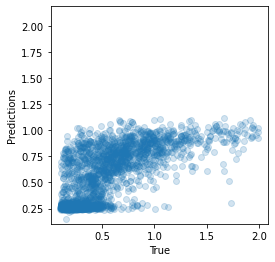

Pearson: (0.6907705255443091, 7.500102778565e-312)
MAE: 0.19516292
MSE: 0.07633664


In [7]:
scatter(cnn_true_train, cnn_pred_train) # first 500

In [9]:
print(np.max(cnn_pred_train))
print(np.max(cnn_true_train))

1.1179318
1.9921052


* Also: auch auf (einem Teil der) Trainingdaten hat das CNN die gleiche "Unart", nicht viel höher als 1.0 vorherzusagen
* auch interessant: Tatsächlich ist das CNN auf den Trainingsdaten weniger overfittet als Bert (keine Korrelation um 0.9)
* das ist ja eigentlich gut
* vielleicht heißt es aber auch, dass man noch länger trainieren sollte?

In [3]:
#FIXED_LEN:  None
#MIN_LEN:  400
#START:  None
bert_pred_rand, bert_true_rand = predict.predict(which="bert", 
                                                 identifier=None, 
                                                 val_batch_size=200, 
                                                 on_set='dev') # random window

Predicting with model BERT with identifier None...
Using device: cpu


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (104046, 42)
Remaining df after conditioning: (12743, 42)
Pearson's r of this batch: (0.7097786967267447, 5.902996385394151e-32)
Pearson's r of this batch: (0.6100576970219828, 8.921457798964502e-22)
Pearson's r of this batch: (0.6873170227771193, 2.638160154922603e-29)
Pearson's r of this batch: (0.6580338785687561, 3.4362431663927846e-26)
Pearson's r of this batch: (0.7167661925044496, 7.841839360888531e-33)
Pearson's r of this batch: (0.6611928531245772, 1.6476599847991434e-26)
Pearson's r of this batch: (0.6241568460575407, 2.8219716135901697e-09)
Pearson's r on whole set: (0.6717560882573252, 5.768291130296277e-168)


1274 [1.2965145  0.16376401 1.9299628  0.9391639  0.6788332 ]
1274 [1.066902   0.17722331 1.063336   0.9705078  0.48020694]


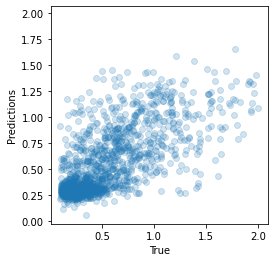

Pearson: (0.6717560882573252, 5.768291130296277e-168)
MAE: 0.21485636
MSE: 0.088244066


In [4]:
scatter(bert_true_rand, bert_pred_rand) # random window between 400 and 512